#Rental Prices and Immigration (Machine Learning Group 13)

In [ ]:
### Session 1 was input by Grace Guo

# Section 1 Import, clean up and preparation of the data

## 1.1 Import data

In [ ]:
from google.colab import files
uploaded = files.upload()
# steps:
#1.Download two files to the local:  'synthetic_rental_prices_canada_updated.csv' and 'PR_Admissions_unpivoted_added_2025.xlsx'
#2.upload the files to the files under this colab notebook


TypeError: 'NoneType' object is not subscriptable

In [53]:
# read csv file with rent by city
import pandas as pd
csv_file = 'synthetic_rental_prices_canada_updated.csv'
df_rental = pd.read_csv(csv_file)
df_rental.tail()

City     Province  Year  Month Rental Type  Bedrooms  Bathrooms  \
9995  Halifax  Nova Scotia  2023      6       Condo         3          2   
9996  Halifax  Nova Scotia  2021     12       Condo         4          3   
9997  Halifax  Nova Scotia  2023      4       Condo         2          2   
9998  Halifax  Nova Scotia  2022      9   Apartment         3          2   
9999  Halifax  Nova Scotia  2022      7   Apartment         3          3   

      Square Footage  Furnished  Pet Friendly  ...  Walk Score  Transit Score  \
9995             987      False         False  ...          70             64   
9996            1438      False          True  ...          88             53   
9997             853       True          True  ...          89             39   
9998            1007      False          True  ...          77             32   
9999            1326      False          True  ...          47             72   

      Building Age  Energy Efficiency Rating  Lease Term  Noise Level  \
9995             1                      8.90           6         4.40   
9996            14                      5.10          12         1.29   
9997            15                      9.54           6         9.74   
9998            27                      5.20          24         4.28   
9999             8                      6.17          24         9.36   

      Nearby Schools Rating  Internet Availability  Crime Rate Index  \
9995                   6.20                   True             89.24   
9996                   8.05                  False             85.35   
9997                   5.75                   True             66.54   
9998                   7.69                  False             61.16   
9999                   7.00                  False             17.36   

      Annual Property Tax  
9995               337.97  
9996               491.14  
9997               521.50  
9998               347.72  
9999               301.48  

[5 rows x 23 columns]

In [69]:
# read xlsx file for the pr data with city and date
xlsx_file = 'PR_Admissions_unpivoted_added_2025.xlsx'
df_pr= pd.read_excel(xlsx_file, dtype = {'Provice':str, 'City': str,'Date':str, 'Admissions':int, 'Month': str, 'Year': int})
df_pr.tail()

#date column is missing values but is redundant so will be dropped

Province                                               City Date  \
22054  Saskatchewan                                            Weyburn  NaN   
22055  Saskatchewan                                            Yorkton  NaN   
22056         Yukon                                      Other - Yukon  NaN   
22057         Yukon  Territories (outside Census agglomeration, Yukon)  NaN   
22058         Yukon                                         Whitehorse  NaN   

       Admissions Month  Year  
22054          14   Sep  2025  
22055          26   Sep  2025  
22056           1   Sep  2025  
22057           0   Sep  2025  
22058          63   Sep  2025

In [64]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22059 entries, 0 to 22058
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Province    22059 non-null  object
 1   City        22059 non-null  object
 2   Date        20007 non-null  object
 3   Admissions  22059 non-null  int64 
 4   Month       22059 non-null  object
 5   Year        22059 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


## 1.2 Check whether the values of Province or City are matching between two dataframes

In [65]:
# Extract unique values
unique_cities_df_rental = set(df_rental['City'].dropna().unique())
unique_cities_df_pr = set(df_pr['City'].dropna().unique())

# Compare
matching_cities = unique_cities_df_rental.intersection(unique_cities_df_pr)
only_in_df_rental = unique_cities_df_rental - unique_cities_df_pr
only_in_df_pr = unique_cities_df_pr - unique_cities_df_rental

print("Matching Cities:", matching_cities)
print("Cities only in df_rental:", only_in_df_rental)
print("Cities only in df_pr:", only_in_df_pr)

Matching Cities: {'Toronto', 'Calgary', 'Halifax', 'Vancouver', 'Edmonton'}
Cities only in df_rental: {'Montreal', 'Ottawa'}
Cities only in df_pr: {'Ottawa - Gatineau (Ontario part)', 'Duncan', 'Québec', 'Sorel-Tracy', 'Williams Lake', 'Essa', 'Moncton', 'Other - British Columbia', 'Campbell River', 'Hamilton', 'Estevan', 'Strathmore', 'Yellowknife', 'Drummondville', 'Collingwood', 'Squamish', 'North Battleford', 'Other - Prince Edward Island', 'Joliette', 'Other - Ontario', "Val-d'Or", 'Peterborough', 'Canmore', 'Guelph', 'Kenora', 'Salmon Arm', 'Windsor', 'Saint-Georges', 'Salaberry-de-Valleyfield', 'Baie-Comeau', 'Saint-Hyacinthe', 'Other - Northwest Territories', 'Grand Falls-Windsor', 'Dawson Creek', 'New Glasgow', 'Belleville - Quinte West', 'Midland', 'Amos', 'Weyburn', 'Dolbeau-Mistassini', 'Wood Buffalo', 'Thunder Bay', 'Campbellton (New Brunswick part)', 'Terrace', 'Petawawa', 'Hawkesbury (Ontario part)', 'Barrie', 'Saguenay', 'Brandon', 'Abbotsford - Mission', 'Wetaskiwin', 

In [5]:
# Cities in df_pr with {'Montreal', 'Ottawa'}, in df_pr {'Montréal','Ottawa - Gatineau (Ontario part)', 'Ottawa - Gatineau (Quebec part)'}
# Next: df_pr, rename 'Montréal' -> 'Montreal',
# combine 'Ottawa - Gatineau (Quebec part)' and 'Ottawa - Gatineau (Ontario part)', then rename to 'Ottawa',
# drop all other cities not in the 7 in th df_rental

In [70]:

df_pr['City'] = df_pr['City'].replace({
    'Montréal': 'Montreal',
    'Ottawa - Gatineau (Ontario part)': 'Ottawa',
    'Ottawa - Gatineau (Quebec part)':'Ottawa'
})  # rename the values in the 'City' column

target_cities = ['Vancouver', 'Edmonton', 'Toronto', 'Calgary', 'Halifax','Montreal', 'Ottawa']

# Drop rows where 'City' is not in the list
df_pr_clean = df_pr[df_pr['City'].isin(target_cities)].reset_index(drop =1)
df_pr_clean.City.unique()

array(['Calgary', 'Edmonton', 'Vancouver', 'Halifax', 'Ottawa', 'Toronto',
       'Montreal'], dtype=object)

In [71]:
df_pr_clean.tail()

Province      City Date  Admissions Month  Year
1027  Nova Scotia   Halifax  NaN         762   Sep  2025
1028      Ontario    Ottawa  NaN        1757   Sep  2025
1029      Ontario   Toronto  NaN        8418   Sep  2025
1030       Quebec  Montreal  NaN        2702   Sep  2025
1031       Quebec    Ottawa  NaN         156   Sep  2025

In [76]:

df_pr_agg = df_pr_clean.groupby(['Province', 'City',  'Month', 'Year'], as_index=False)['Admissions'].sum()
df_pr_agg.tail()

Province    City Month  Year  Admissions
1027   Quebec  Ottawa   Sep  2021         175
1028   Quebec  Ottawa   Sep  2022         175
1029   Quebec  Ottawa   Sep  2023         275
1030   Quebec  Ottawa   Sep  2024         215
1031   Quebec  Ottawa   Sep  2025         156

In [77]:
month_mapping = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
    'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
    'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}

# Map the Month column
df_pr_agg['Month'] = df_pr_agg['Month'].map(month_mapping)
df_pr_agg['Month'] = pd.to_numeric(df_pr_agg['Month'])
df_pr_agg.tail()

Province    City  Month  Year  Admissions
1027   Quebec  Ottawa      9  2021         175
1028   Quebec  Ottawa      9  2022         175
1029   Quebec  Ottawa      9  2023         275
1030   Quebec  Ottawa      9  2024         215
1031   Quebec  Ottawa      9  2025         156

## 1.3 Data Mining: explore the impact coumns to the Rent

In [78]:
df_explore = df_rental.copy()
df_rental.dtypes

City                             object
Province                         object
Year                              int64
Month                             int64
Rental Type                      object
Bedrooms                          int64
Bathrooms                         int64
Square Footage                    int64
Furnished                          bool
Pet Friendly                       bool
Parking Included                   bool
Distance to City Center (km)    float64
Monthly Rent                    float64
Walk Score                        int64
Transit Score                     int64
Building Age                      int64
Energy Efficiency Rating        float64
Lease Term                        int64
Noise Level                     float64
Nearby Schools Rating           float64
Internet Availability              bool
Crime Rate Index                float64
Annual Property Tax             float64
dtype: object

In [79]:
df_explore.columns = df_explore.columns.str.replace(' ', '', regex=False) #remove space in the column name
df_explore.dtypes

City                         object
Province                     object
Year                          int64
Month                         int64
RentalType                   object
Bedrooms                      int64
Bathrooms                     int64
SquareFootage                 int64
Furnished                      bool
PetFriendly                    bool
ParkingIncluded                bool
DistancetoCityCenter(km)    float64
MonthlyRent                 float64
WalkScore                     int64
TransitScore                  int64
BuildingAge                   int64
EnergyEfficiencyRating      float64
LeaseTerm                     int64
NoiseLevel                  float64
NearbySchoolsRating         float64
InternetAvailability           bool
CrimeRateIndex              float64
AnnualPropertyTax           float64
dtype: object

In [80]:
dep_var = ['MonthlyRent']

categorical_vars = ['City', 'RentalType', 'Furnished','PetFriendly','ParkingIncluded','InternetAvailability']

discrete_vars = ['Year', 'Month', 'Bedrooms', 'SquareFootage', 'WalkScore',
                 'TransitScore', 'BuildingAge', 'LeaseTerm']

continuous_vars = ['DistancetoCityCenter(km)', 'EnergyEfficiencyRating', 'NoiseLevel','NearbySchoolsRating','CrimeRateIndex','AnnualPropertyTax']


In [81]:
df_explore.loc[:, dep_var + discrete_vars + continuous_vars].describe()

MonthlyRent          Year        Month     Bedrooms  SquareFootage  \
count  10000.000000  10000.000000  10000.00000  10000.00000   10000.000000   
mean    4675.719273   2020.990800      6.45590      2.49790     999.902800   
std     1348.753390      1.416445      3.44947      1.12362     246.164175   
min     1795.200000   2019.000000      1.00000      1.00000     330.000000   
25%     3648.327500   2020.000000      3.00000      1.00000     799.000000   
50%     4498.495000   2021.000000      6.00000      3.00000    1003.000000   
75%     5637.927500   2022.000000      9.00000      4.00000    1200.000000   
max     8346.720000   2023.000000     12.00000      4.00000    1622.000000   

          WalkScore  TransitScore   BuildingAge     LeaseTerm  \
count  10000.000000  10000.000000  10000.000000  10000.000000   
mean      64.748400     54.768900     24.483100     14.032200   
std       20.025584     20.274146     14.512111      7.527884   
min       30.000000     20.000000      0.000000      6.000000   
25%       48.000000     37.000000     12.000000      6.000000   
50%       65.000000     55.000000     24.000000     12.000000   
75%       82.000000     72.000000     37.000000     24.000000   
max       99.000000     89.000000     49.000000     24.000000   

       DistancetoCityCenter(km)  EnergyEfficiencyRating    NoiseLevel  \
count              10000.000000            10000.000000  10000.000000   
mean                   9.445408                7.516058      5.527206   
std                    5.175747                1.439167      2.579528   
min                    0.000000                5.000000      1.000000   
25%                    4.747500                6.280000      3.280000   
50%                    7.560000                7.510000      5.540000   
75%                   15.000000                8.770000      7.800000   
max                   15.000000               10.000000     10.000000   

       NearbySchoolsRating  CrimeRateIndex  AnnualPropertyTax  
count         10000.000000    10000.000000       10000.000000  
mean              7.504102       50.099838         346.041457  
std               1.449049       28.547406         116.785214  
min               5.000000        1.000000         123.290000  
25%               6.250000       25.450000         245.430000  
50%               7.510000       50.675000         344.850000  
75%               8.760000       74.552500         447.442500  
max              10.000000      100.000000         572.430000

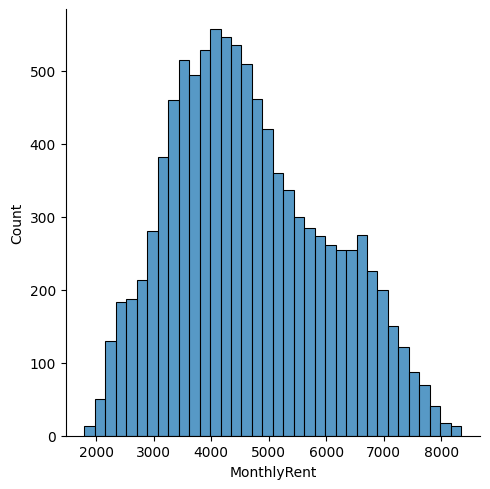

In [82]:
import seaborn as sns
sns.displot(df_explore['MonthlyRent'])

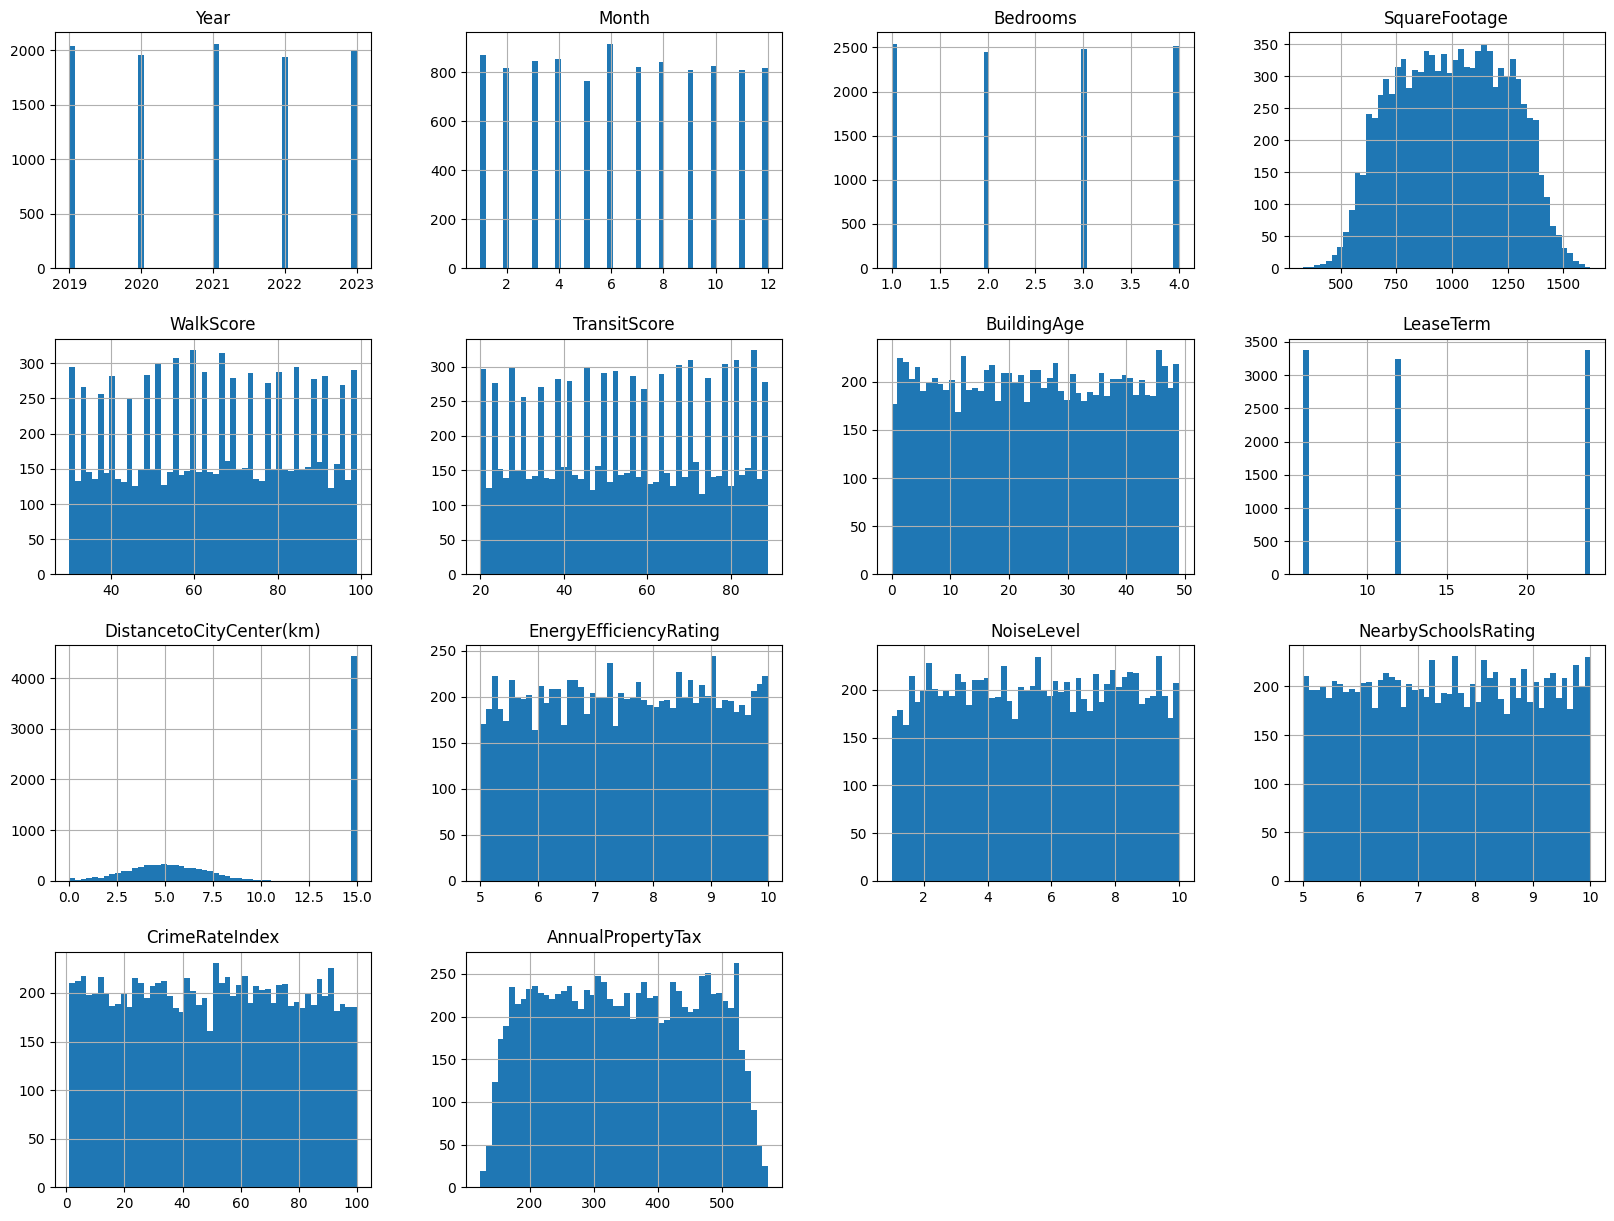

In [83]:
import matplotlib.pyplot as plt
df_explore.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()

In [84]:
corr_matrix = df_explore.loc[:, ['MonthlyRent'] + continuous_vars].corr(method='pearson')
corr_matrix['MonthlyRent'].sort_values(ascending=False)

MonthlyRent                 1.000000
DistancetoCityCenter(km)    0.597690
AnnualPropertyTax           0.120410
NearbySchoolsRating         0.009233
CrimeRateIndex              0.000232
NoiseLevel                 -0.007431
EnergyEfficiencyRating     -0.010248
Name: MonthlyRent, dtype: float64

In [85]:
corr_matrix = df_explore.loc[:, ['MonthlyRent'] + discrete_vars].corr(method='pearson')
corr_matrix['MonthlyRent'].sort_values(ascending=False)

MonthlyRent      1.000000
Bedrooms         0.319067
SquareFootage    0.295791
Year             0.105745
BuildingAge      0.003577
WalkScore        0.000912
Month           -0.000835
TransitScore    -0.008302
LeaseTerm       -0.023013
Name: MonthlyRent, dtype: float64

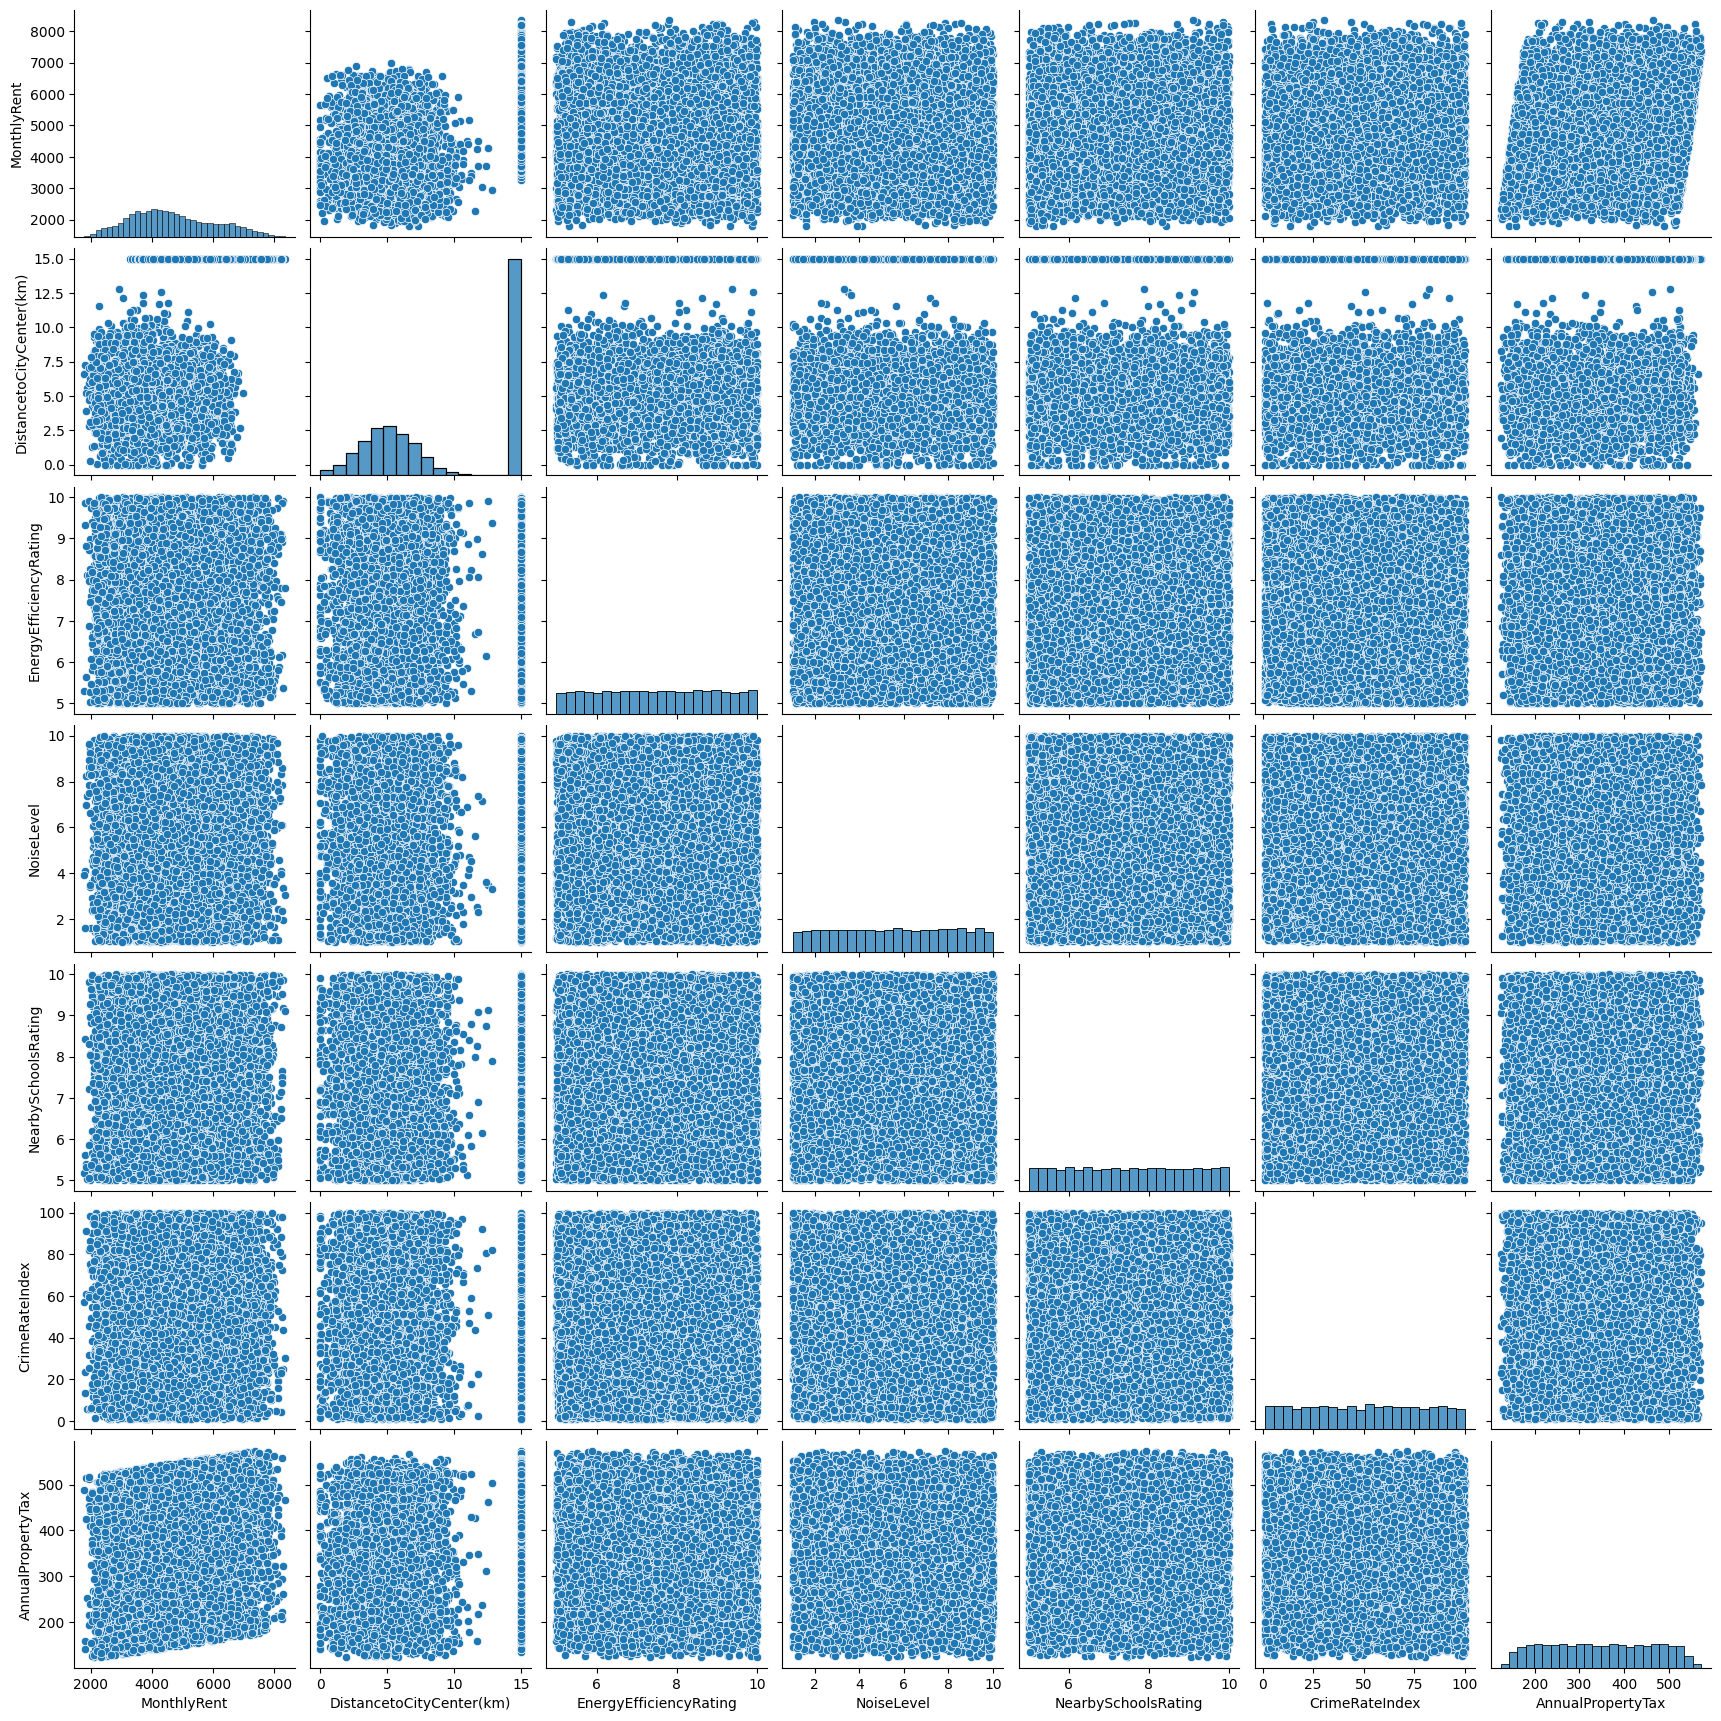

In [86]:
sns.pairplot(data=df_explore.loc[:, ['MonthlyRent'] + continuous_vars])
plt.show()

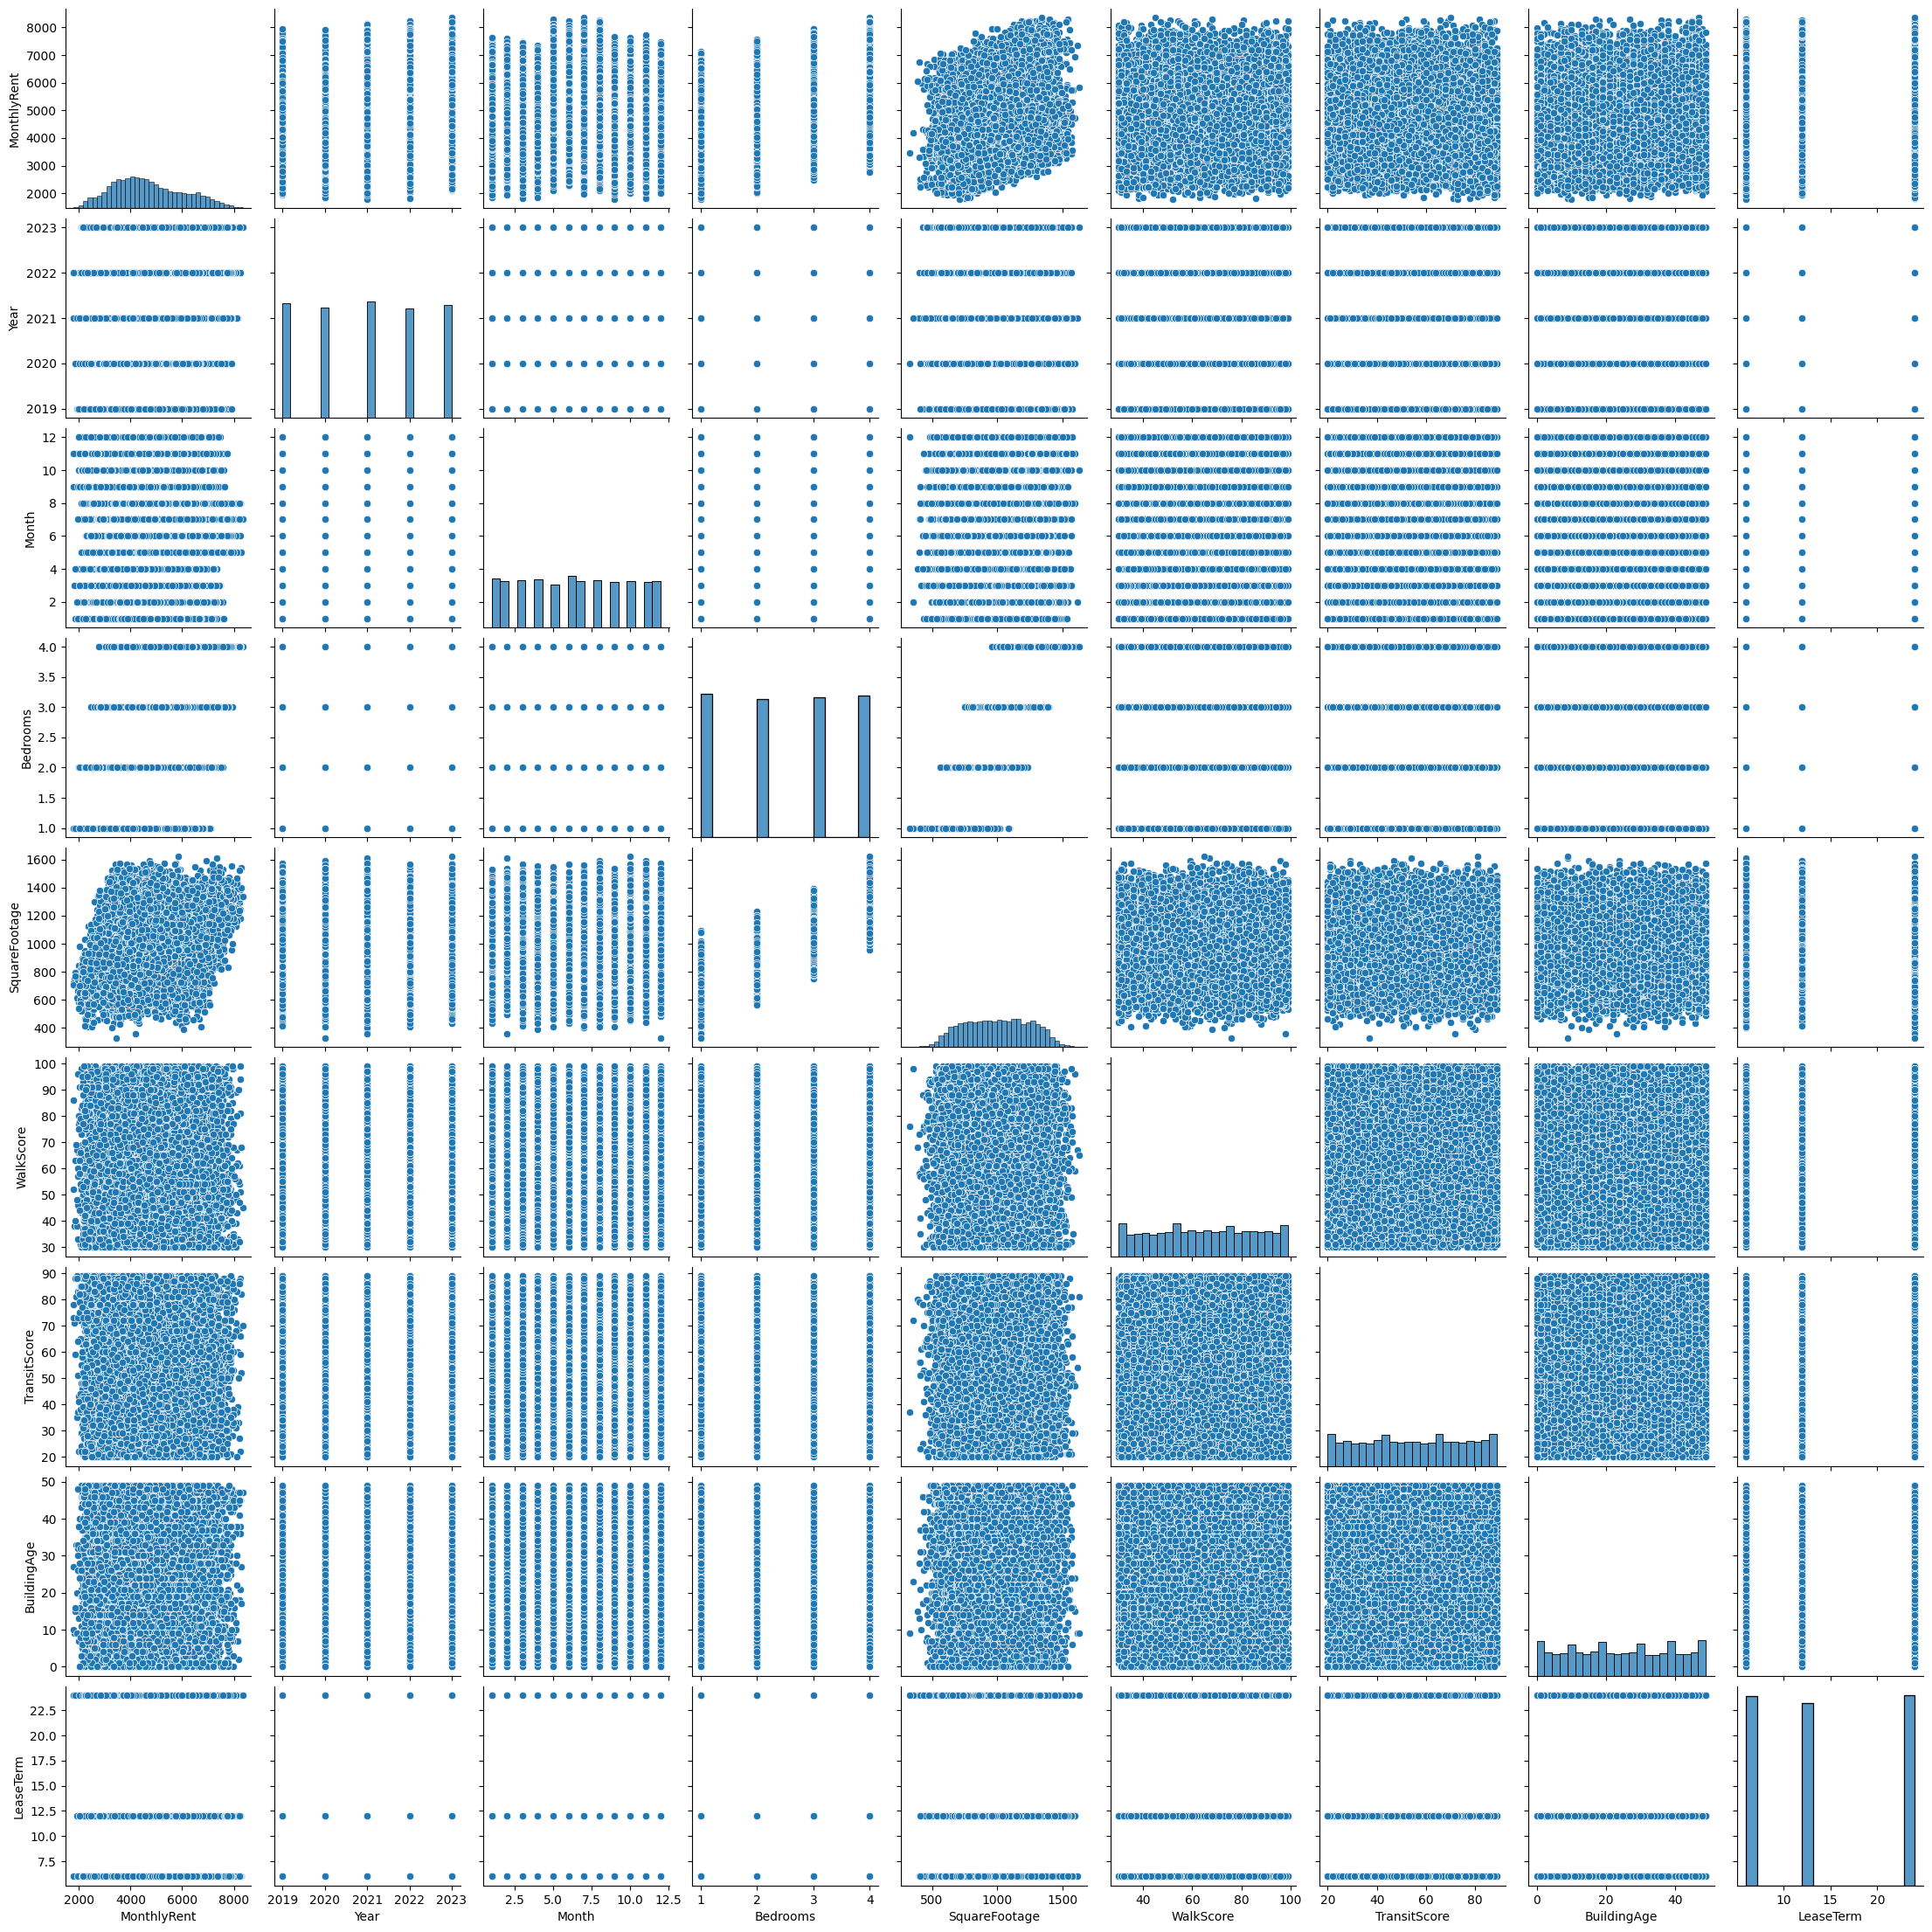

In [87]:
sns.pairplot(data=df_explore.loc[:, ['MonthlyRent'] + discrete_vars])
plt.show()

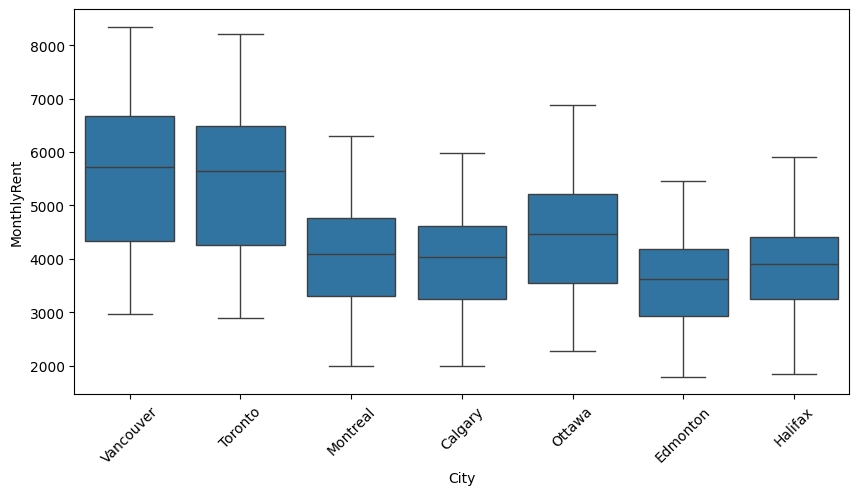

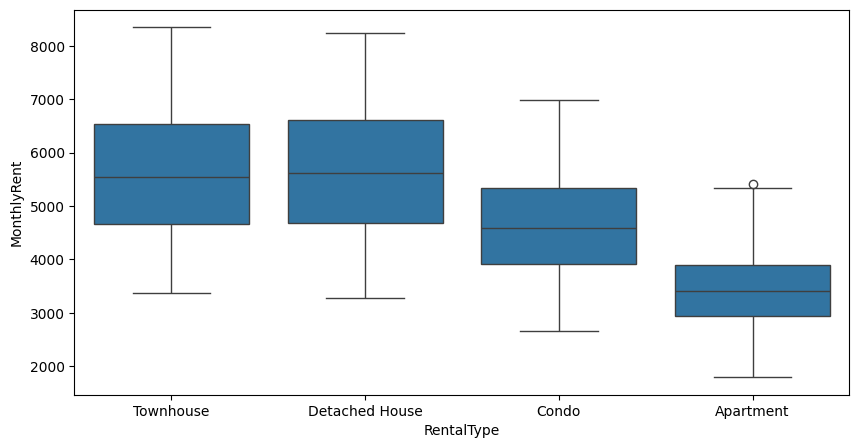

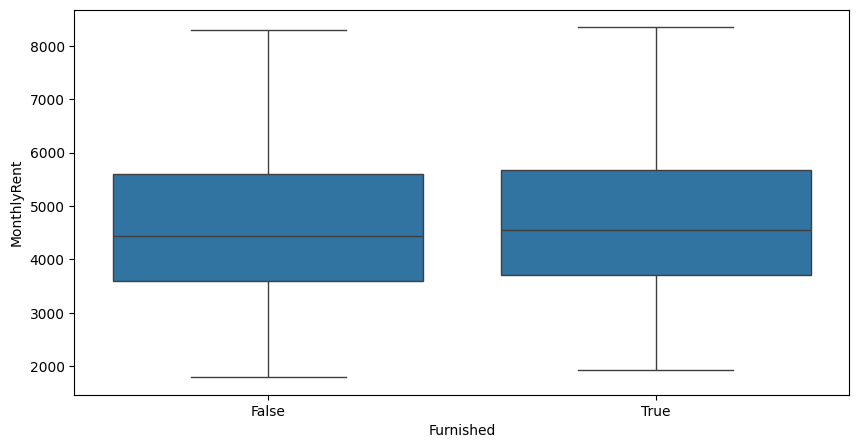

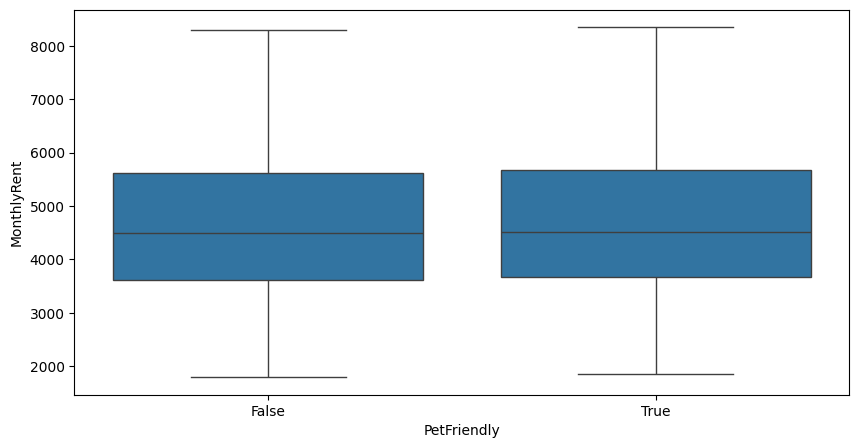

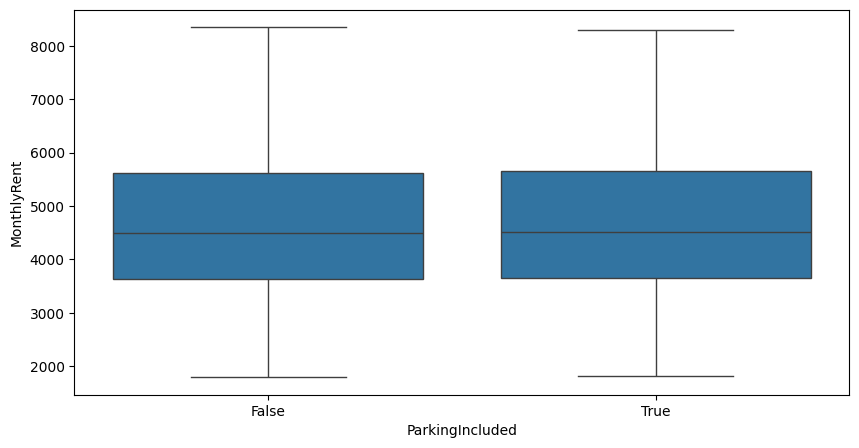

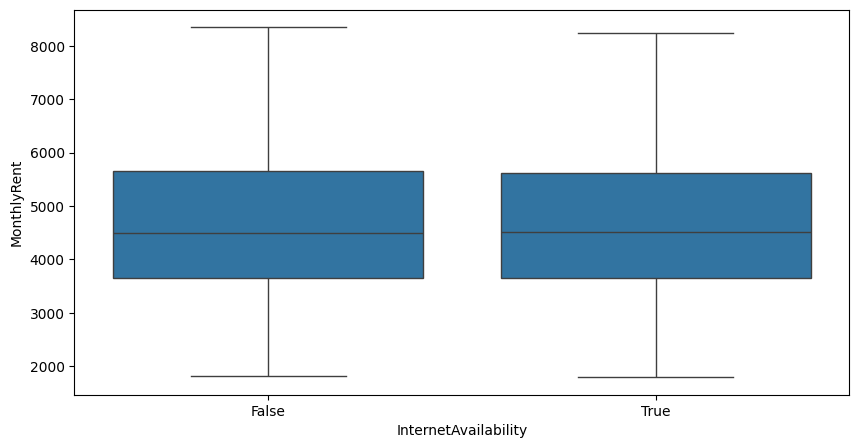

In [88]:
for item in [x for x in categorical_vars ]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=item, y='MonthlyRent', data=df_explore)
    if len(df_explore[item].unique()) > 4:
        plt.xticks(rotation=45)
    plt.show()

### Short conclusion on the list of high impacted columns:

categorical_vars = ['City', 'RentalType']

discrete_vars = ['Year', 'Month', 'Bedrooms', 'SquareFootage']

continuous_vars = ['AnnualPropertyTax']


In [89]:
df_rent_clean = df_explore[['City', 'RentalType', 'Year', 'Month', 'Bedrooms', 'SquareFootage','AnnualPropertyTax','MonthlyRent']]
df_rent_clean.tail()

City RentalType  Year  Month  Bedrooms  SquareFootage  \
9995  Halifax      Condo  2023      6         3            987   
9996  Halifax      Condo  2021     12         4           1438   
9997  Halifax      Condo  2023      4         2            853   
9998  Halifax  Apartment  2022      9         3           1007   
9999  Halifax  Apartment  2022      7         3           1326   

      AnnualPropertyTax  MonthlyRent  
9995             337.97      4450.60  
9996             491.14      4104.75  
9997             521.50      3471.55  
9998             347.72      2851.14  
9999             301.48      3353.65

## 1.4 Join the rent and pr dataframes

In [91]:
df_combine = pd.merge(df_rent_clean, df_pr_agg, on=['City', 'Year', 'Month'], how='left')
df_combine.drop(['Province'], inplace=True, axis=1) #drop non-important columns from df_pr_agg
df_combine

City      RentalType  Year  Month  Bedrooms  SquareFootage  \
0      Vancouver       Townhouse  2020      4         3           1150   
1      Vancouver  Detached House  2019     10         1            652   
2      Vancouver           Condo  2020      9         4           1382   
3      Vancouver  Detached House  2023      5         1            626   
4      Vancouver  Detached House  2020      3         3           1291   
...          ...             ...   ...    ...       ...            ...   
10995    Halifax           Condo  2023      6         3            987   
10996    Halifax           Condo  2021     12         4           1438   
10997    Halifax           Condo  2023      4         2            853   
10998    Halifax       Apartment  2022      9         3           1007   
10999    Halifax       Apartment  2022      7         3           1326   

       AnnualPropertyTax  MonthlyRent  Admissions  
0                 222.29      6514.17         265  
1                 329.94      5716.42        3535  
2                 502.31      5833.37        1515  
3                 440.88      6719.09        5945  
4                 374.33      6629.84        2025  
...                  ...          ...         ...  
10995             337.97      4450.60         740  
10996             491.14      4104.75        1055  
10997             521.50      3471.55         490  
10998             347.72      2851.14        1055  
10999             301.48      3353.65        1165  

[11000 rows x 9 columns]

In [23]:
#convert admissions to float
#df_combine['Admissions'] = df_combine['Admissions'].str.replace(',', '').astype(float)
#df_combine = df_combine[df_combine['Admissions'].notna()]
#df_combine.tail()

AttributeError: Can only use .str accessor with string values!

##1.5 Prepare 2025 rental prices data for prediction

In [92]:
df_rent_clean['Year'].unique()

array([2020, 2019, 2023, 2021, 2022])

In [99]:
df_rent_clean_2024 = df_rent_clean.copy()
df_rent_clean_2024 = df_rent_clean_2024.loc[df_rent_clean_2024['Year'] == 2023, :]
df_rent_clean_2024['AdmissionsYear'] = 2024 

df_rent_clean_2025 = df_rent_clean.copy()
df_rent_clean_2025 = df_rent_clean_2025.loc[df_rent_clean_2025['Year'] == 2023, :]
df_rent_clean_2025['AdmissionsYear'] = 2025 
df_rent_clean_2025.head() 



City      RentalType  Year  Month  Bedrooms  SquareFootage  \
3   Vancouver  Detached House  2023      5         1            626   
10  Vancouver  Detached House  2023      3         2           1163   
13  Vancouver           Condo  2023     10         2            769   
14  Vancouver           Condo  2023      4         2            894   
23  Vancouver           Condo  2023      8         2            954   

    AnnualPropertyTax  MonthlyRent  AdmissionsYear  
3              440.88      6719.09            2025  
10             281.30      6539.49            2025  
13             210.71      5147.89            2025  
14             185.57      5323.09            2025  
23             548.24      6157.94            2025

In [95]:
#rename df_pr_agg['Year'] to 'AdmissionsYear' so join works
df_pr_agg2025=df_pr_agg.rename(columns={'Year': 'AdmissionsYear'})
df_pr_agg2025.tail()

Province    City  Month  AdmissionsYear  Admissions
1027   Quebec  Ottawa      9            2021         175
1028   Quebec  Ottawa      9            2022         175
1029   Quebec  Ottawa      9            2023         275
1030   Quebec  Ottawa      9            2024         215
1031   Quebec  Ottawa      9            2025         156

In [101]:
#Join 2024 Rental Listings with 2025 PR Admissions to predict Monthly Rent in 2025
df_combine_2024 = df_rent_clean_2024.merge(df_pr_agg2025, on=['City', 'AdmissionsYear', 'Month'], how='left')
df_combine_2024.drop(['Province'], inplace=True, axis=1) #drop non-important columns from df_pr_agg
df_combine_2024 = df_combine_2024[df_combine_2024['Admissions'].notna()]

df_combine_2025 = df_rent_clean_2025.merge(df_pr_agg2025, on=['City', 'AdmissionsYear', 'Month'], how='left')
df_combine_2025.drop(['Province'], inplace=True, axis=1) #drop non-important columns from df_pr_agg
df_combine_2025 = df_combine_2025[df_combine_2025['Admissions'].notna()] #PR admissions data only present until Sept of 2024. Drop records past sept 2025
df_combine_2025 

df_combine_2425 = pd.concat([df_combine_2024, df_combine_2025]) 
df_combine_2425.head()

City      RentalType  Year  Month  Bedrooms  SquareFootage  \
0  Vancouver  Detached House  2023      5         1            626   
1  Vancouver  Detached House  2023      3         2           1163   
2  Vancouver           Condo  2023     10         2            769   
3  Vancouver           Condo  2023      4         2            894   
4  Vancouver           Condo  2023      8         2            954   

   AnnualPropertyTax  MonthlyRent  AdmissionsYear  Admissions  
0             440.88      6719.09            2024      4740.0  
1             281.30      6539.49            2024      3590.0  
2             210.71      5147.89            2024      3273.0  
3             185.57      5323.09            2024      4005.0  
4             548.24      6157.94            2024      4355.0

# Section 2 Pre-processing

As there are no missing values, no imputing is required and we can move on to encoding, and scaling

## 2.1 Creating pre-processing pipeline for Categorical Encoding and Standarized Scaling


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [28]:
dep_var = ['MonthlyRent']

categorical_vars_comb = ['City', 'RentalType']

discrete_vars_comb = ['Year', 'Month', 'Bedrooms', 'SquareFootage','Admissions']

continuous_vars_comb = ['AnnualPropertyTax']

In [30]:
# Categorical - one hot encode
cat_ohe_step = ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars_comb)]

# Numerical -  scale
num_scl_step = ('scl', StandardScaler())
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars_comb + continuous_vars_comb)]

In [31]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)

ct.fit(df_combine[categorical_vars_comb + discrete_vars_comb + continuous_vars_comb])
X=ct.transform(df_combine[categorical_vars_comb + discrete_vars_comb + continuous_vars_comb])
y=df_combine[['MonthlyRent']].values

In [32]:
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.61141269,
        -0.93427349, -1.05443709],
       [ 0.        ,  0.        ,  0.        , ..., -1.41041586,
        -0.09504114, -0.1311822 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.55330872,
        -0.61346602,  1.34714055],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.59437662,
        -0.87652815,  1.51172264],
       [ 0.        ,  0.        ,  1.        , ...,  0.03084746,
        -0.73152317,  0.02130708],
       [ 0.        ,  0.        ,  1.        , ...,  1.32595451,
        -0.70329211, -0.37526798]])

X and y are now ready to be used for modelling

## 2.2 Train-test split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8800, 17) (2200, 17) (8800, 1) (2200, 1)


# Section 3 Model Selection

# Regression Models:
First, we split the dataset into training and test sets. 80% for training and remining 20% for testing. This approach ensured that the model was trained on a substantial portion of the data while retaining a significant portion for testing.
Next, we trained the model using Regressor models- Random Forest, Linear Regression to predict rental prices – which was our target variable.

We evaluated the models based on the following performance metrics:
Root Mean Squared Error (RMSE): To measurs the average magnitude of the errors between the predicted values and the actual values. The lower the RMSE value, the better the model.
R-squared (R2) Score: To indicate how well our regression model's predictions fit the actual data. The higher this value, the better the model's prediction.

We then carry out cross-validation using  k-fold cross validation technique to assess model performance and generalization.

In [35]:

#import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define target (y) and features (X)
y = df_combine['MonthlyRent']  # Target variable

# Features to include
X = df_combine[['City', 'RentalType', 'Year', 'Month', 'Bedrooms', 'SquareFootage', 'AnnualPropertyTax', 'Admissions']]

# Encode categorical features ('City' and 'RentalType')
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


X_train shape: (8800, 15)
X_test shape: (2200, 15)
y_train shape: (8800,)
y_test shape: (2200,)
Coefficients: [ 8.50876687e+01  4.88311498e-01  3.80107551e+02 -1.16774205e-02
  8.73855049e-02  1.88608589e-02 -3.21496754e+02 -1.76449277e+02
  1.44435672e+02  5.33726033e+02  1.35816990e+03  1.63393258e+03
  1.22168529e+03  2.21032677e+03  2.19265201e+03]
Intercept: -170312.182401799
Mean Squared Error: 114799.00900506652
R² Score: 0.9353817159270535


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Define target (y) and features (X)
y = df_combine['MonthlyRent']  # Target variable

# Features to include
X = df_combine[['City', 'RentalType', 'Year', 'Month', 'Bedrooms', 'SquareFootage', 'AnnualPropertyTax', 'Admissions']]

# Encode categorical features ('City' and 'RentalType')
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


X_train shape: (8800, 15)
X_test shape: (2200, 15)
y_train shape: (8800,)
y_test shape: (2200,)
Mean Squared Error: 34611.56304064926
R² Score: 0.9805177777042425


In [37]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Define a custom scorer for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform k-fold cross-validation (k=5)
scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

# Convert negative MSE to positive for interpretability
mse_scores = -scores

# Output results
print("Random Forest Regressor Cross-Validation Results:")
print("Mean Squared Errors for each fold:", mse_scores)
print("Average MSE:", mse_scores.mean())


Random Forest Regressor Cross-Validation Results:
Mean Squared Errors for each fold: [2406430.86870896   99202.60377874  934899.47851753   64722.21715475
   76471.10794809]
Average MSE: 716345.2552216125


In [38]:

# Encode categorical features
#X = pd.get_dummies(X, drop_first=True)

# Initialize the Linear Regression model
model = LinearRegression()

# Define a custom scorer for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform k-fold cross-validation (k=5)
scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

# Convert negative MSE to positive for interpretability
mse_scores = -scores

# Output results
print("Linear Regression Cross-Validation Results:")
print("Mean Squared Errors for each fold:", mse_scores)
print("Average MSE:", mse_scores.mean())


Linear Regression Cross-Validation Results:
Mean Squared Errors for each fold: [2619180.59845891  153294.52588975  122173.16363917   99712.61513702
  140622.86745715]
Average MSE: 626996.7541164018


In [39]:
# Hyperparameter Tuning for Random Forest Regressor 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


df_combine = pd.merge(df_rent_clean, df_pr_agg, on=['City', 'Year', 'Month'], how='left')
df_combine.drop(['Date', 'Province'], inplace=True, axis=1)  # Drop non-important columns

# Ensure categorical columns are consistent
for col in df_combine.select_dtypes(include=['object', 'category']).columns:
    df_combine[col] = df_combine[col].astype(str)

# Set the actual target variable name
target_variable = 'MonthlyRent'  # Replace with the correct target column name

# Identify categorical and numerical columns
categorical_columns = df_combine.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_combine.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude the target variable from the features
numerical_columns = [col for col in numerical_columns if col != target_variable]

# Separate features and target
X = df_combine.drop(columns=[target_variable])
y = df_combine[target_variable]

# Define preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Keep numerical columns untouched
)

# Define the Random Forest model
model = RandomForestRegressor(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Define the parameter grid for tuning
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score (R^2):", test_score)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.9s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   1.8s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   2.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   2.0s
[CV] END model__max_depth=10, model__mi

/var/folders/jf/jkn9tlsd4974v36_v_rm_ck80000gn/T/ipykernel_66182/4277649304.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


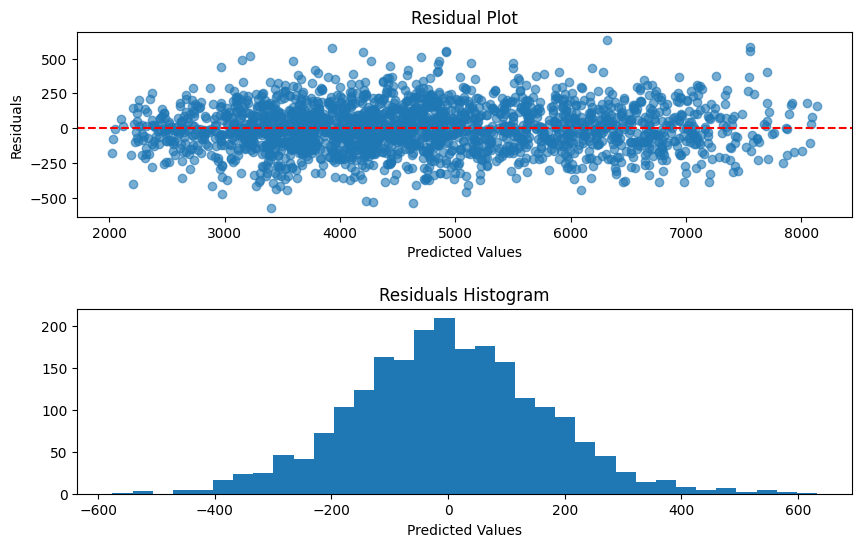

In [43]:
## Testing the best model 

y_pred = best_model.predict(X_test) 
residuals = y_test - y_pred  

fig = plt.figure(figsize=(10, 6))  
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(211) 
ax2 = fig.add_subplot(212)
ax1.scatter(y_pred, residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Plot')

ax2.hist(residuals, bins = 35,)
ax2.set_xlabel('Predicted Values')
ax2.set_title('Residuals Histogram')

fig.show()
 

Residuals are well distributed along the predicted value

In [44]:
## Checking for overfittng  

# Evaluate R^2 on the training set
train_score = best_model.score(X_train, y_train)

# Print train and test scores
print("Training Set Score (R^2):", train_score)
print("Test Set Score (R^2):", test_score)

Training Set Score (R^2): 0.996224777357276
Test Set Score (R^2): 0.9846805817641215


Training score is slightly better, but it is not enough to indicate overfitting. Overall the model is generalizing well and R2 score is exceptional

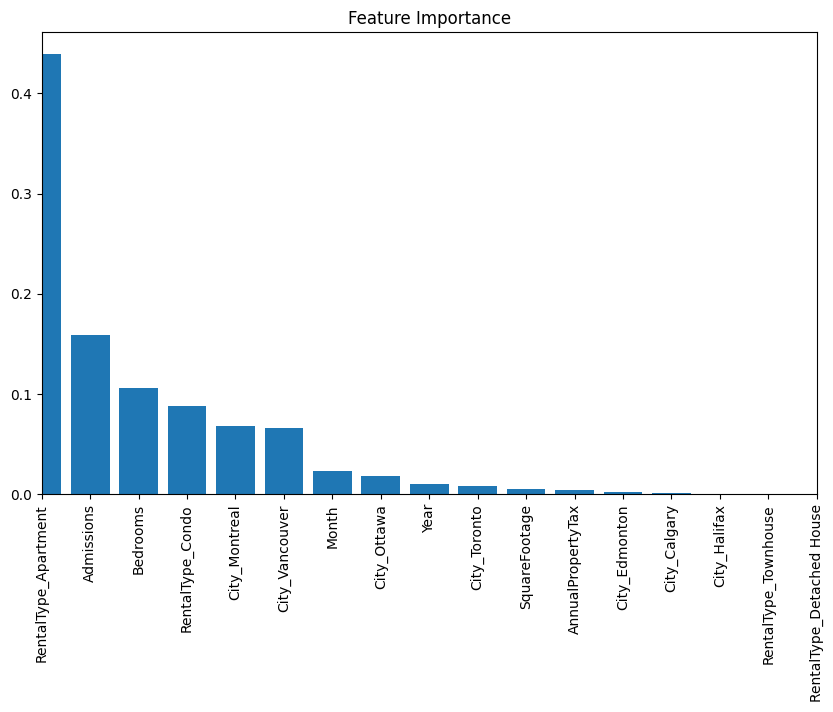

In [47]:
## Checking for feature importances 
import numpy as np 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Get the feature names after preprocessing
preprocessor = best_model.named_steps['preprocessor']
ohe = preprocessor.named_transformers_['cat']

# Extracting names for one-hot encoded features
ohe_feature_names = ohe.get_feature_names_out(categorical_columns)

# Combine numerical and one-hot encoded feature names
all_feature_names = list(ohe_feature_names) + numerical_columns

# Extract feature importance from the Random Forest model
importances = best_model.named_steps['model'].feature_importances_

# Sort and plot feature importance
import numpy as np
import matplotlib.pyplot as plt

sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))

plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xlim((0,10))
plt.xticks(range(len(importances)), np.array(all_feature_names)[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.show()

## Predicting prices for 2024 and 2025 

In [112]:
## Predicting for 2024 and 2025 

X_2425 = df_combine_2425.drop(columns=['MonthlyRent']) 
predict_2425 = best_model.predict(X_2425) 

df_predict = X_2425.copy() 
df_predict['MonthlyRent'] = predict_2425
df_predict.head() 
df_predict_group = df_predict.groupby(by=['City','AdmissionsYear','Month'], as_index=False).agg({'MonthlyRent':'mean'}).rename(columns={'AdmissionsYear':'Year'}) 
df_predict_group['Source'] ='Prediction'
df_predict_group.head()

City  Year  Month  MonthlyRent      Source
0  Calgary  2024      1  4055.354960  Prediction
1  Calgary  2024      2  3766.879470  Prediction
2  Calgary  2024      3  4126.449070  Prediction
3  Calgary  2024      4  3788.460991  Prediction
4  Calgary  2024      5  4399.566676  Prediction

In [113]:
## Combining historic rent data with predicted  
df_combine_group = df_combine.groupby(by=['City','Year','Month'], as_index=False).agg({'MonthlyRent':'mean'})
df_combine_group['Source'] = 'Historic'
df_combine_group.head()

City  Year  Month  MonthlyRent    Source
0  Calgary  2019      1  3593.680800  Historic
1  Calgary  2019      2  3974.468148  Historic
2  Calgary  2019      3  3570.254286  Historic
3  Calgary  2019      4  3786.260833  Historic
4  Calgary  2019      5  4124.542941  Historic

In [148]:
## combining historic and prediction  
combined = pd.concat([df_predict_group,df_combine_group]) 
#combined =  pd.concat([df_combine,df_predict])
combined['Year-Month'] = pd.to_datetime(combined['Year'].astype(str)+"-"+combined['Month'].astype(str),yearfirst=True)
combined.sort_values(by='Year-Month', ascending=True, inplace=True)
combined.reset_index(drop=True, inplace=True)
combined.tail()

City  Year  Month  MonthlyRent      Source Year-Month
562    Toronto  2025      9  5509.034414  Prediction 2025-09-01
563    Calgary  2025      9  3803.827338  Prediction 2025-09-01
564  Vancouver  2025      9  5601.064099  Prediction 2025-09-01
565   Edmonton  2025      9  3482.075050  Prediction 2025-09-01
566    Halifax  2025      9  3571.995503  Prediction 2025-09-01

In [143]:
## preparing Admissions data for plot 
df_pr['Year-Month'] = pd.to_datetime(df_pr['Year'].astype(str)+"-"+df_pr['Month'].astype(str),yearfirst=True) 
df_pr.sort_values(by='Year-Month', ascending=True, inplace=True)
df_pr.reset_index(drop= True,inplace=True)
df_pr.head()

/var/folders/jf/jkn9tlsd4974v36_v_rm_ck80000gn/T/ipykernel_66182/4104279342.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pr['Year-Month'] = pd.to_datetime(df_pr['Year'].astype(str)+"-"+df_pr['Month'].astype(str),yearfirst=True)


Province            City                 Date  Admissions Month  Year  \
0  Alberta          Brooks  2015-01-01 00:00:00          10   Jan  2015   
1  Alberta         Camrose  2015-01-01 00:00:00           0   Jan  2015   
2  Alberta         Canmore  2015-01-01 00:00:00           5   Jan  2015   
3  Alberta        Edmonton  2015-01-01 00:00:00         605   Jan  2015   
4  Alberta  Grande Prairie  2015-01-01 00:00:00          15   Jan  2015   

  Year-Month  
0 2015-01-01  
1 2015-01-01  
2 2015-01-01  
3 2015-01-01  
4 2015-01-01

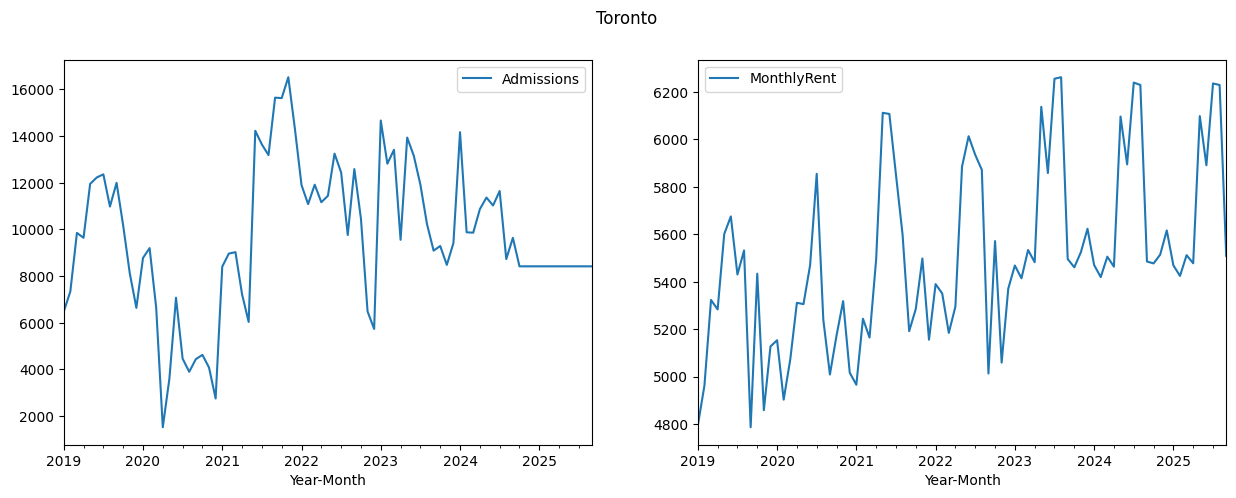

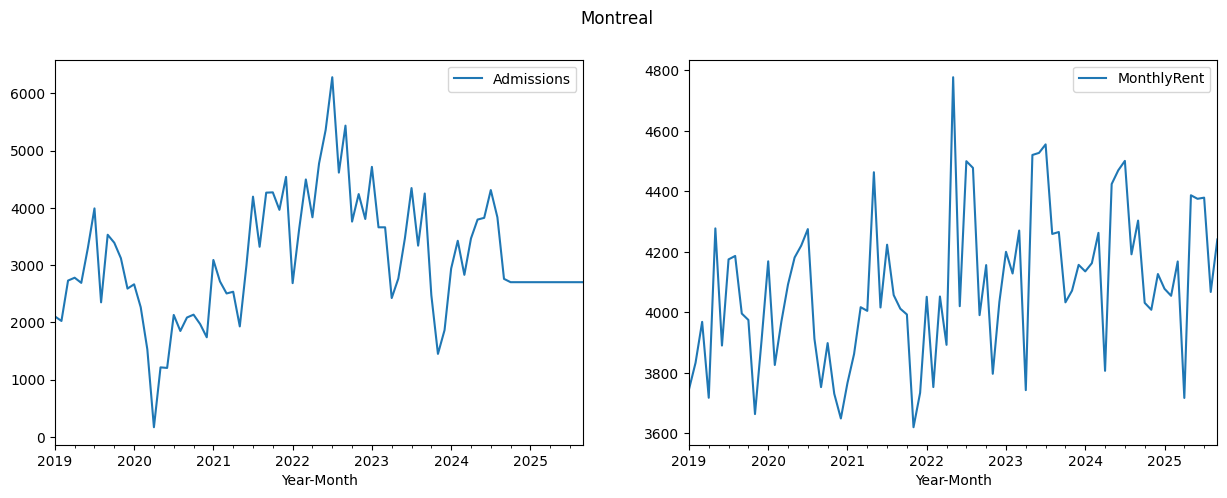

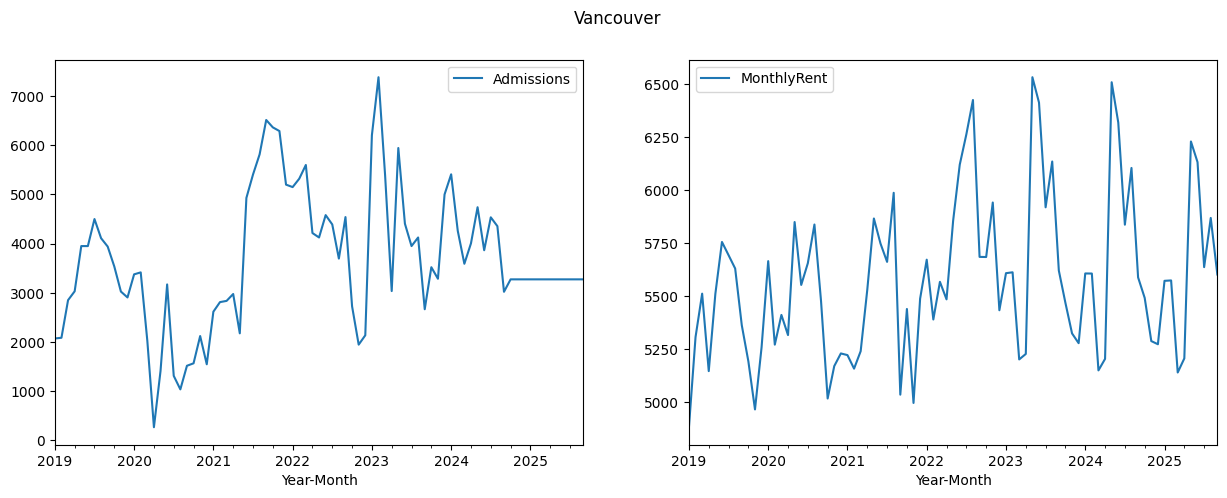

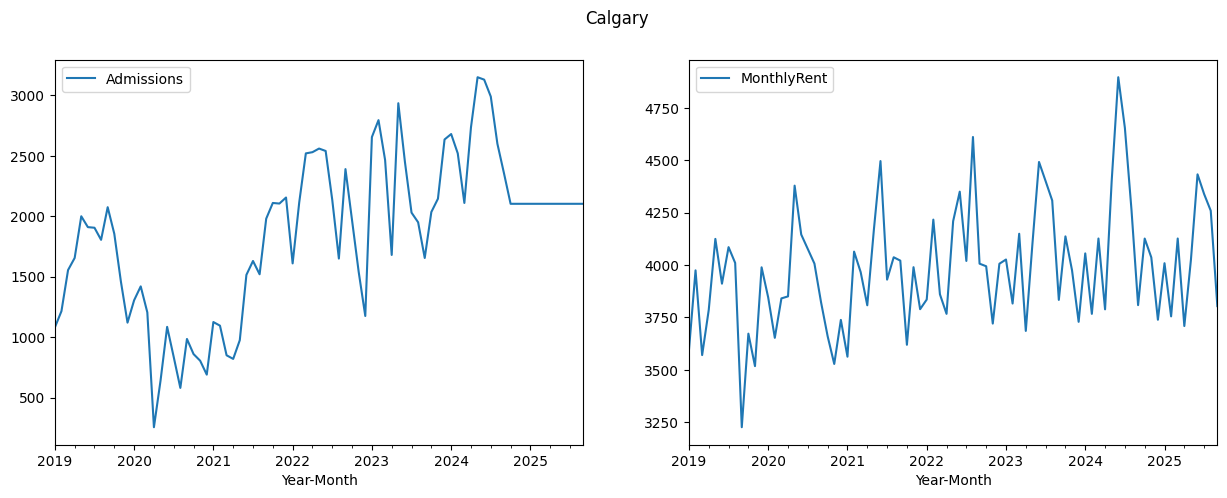

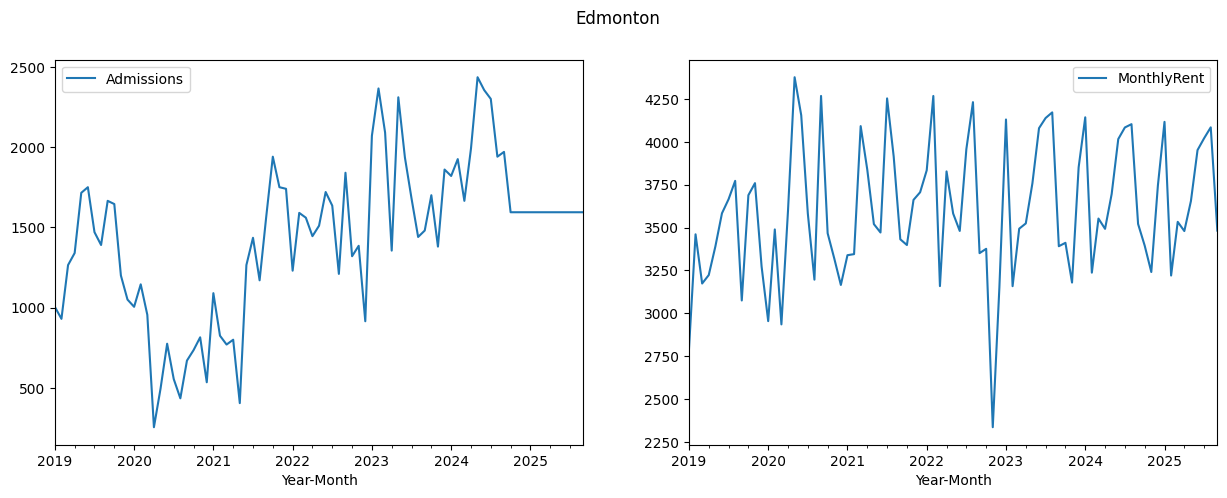

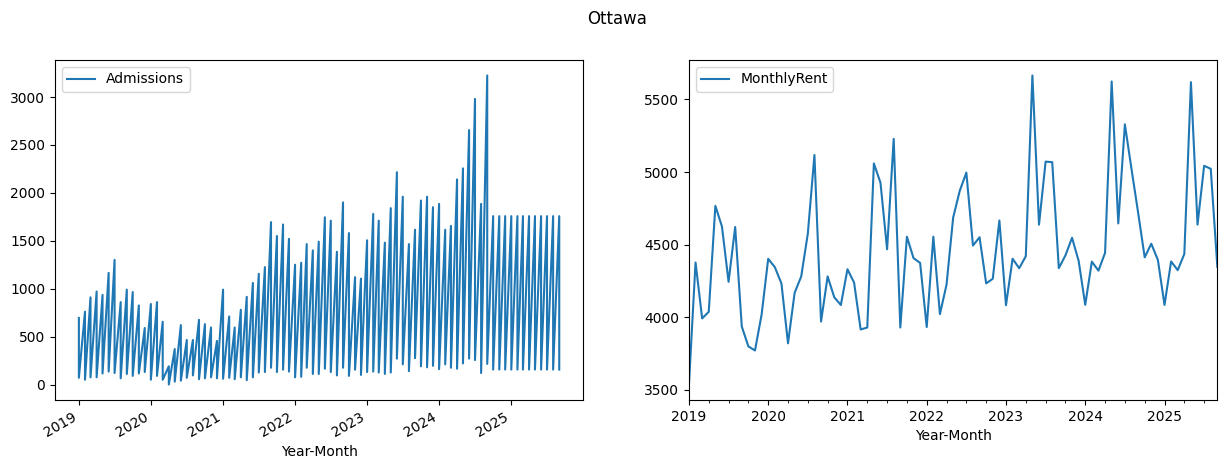

In [158]:
## Plotting data for the most populous cities in Canada


for city in ['Toronto','Montreal','Vancouver','Calgary','Edmonton','Ottawa']: 
    fig = plt.figure(figsize=(15,5))
    fig.suptitle(city) 
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122) 
 
    #ax2.title('Rentals in {}'.format(city))
    pr_plot = df_pr.loc[(df_pr['City']==city)&(df_pr['Year']>=2019),['Year-Month','Admissions']]
    pr_plot.plot(x='Year-Month', y='Admissions', ax= ax1)  
    combined_plot = combined.loc[(combined['City']==city),['Year-Month','MonthlyRent']]
    combined_plot.plot(x='Year-Month', y='MonthlyRent',ax= ax2)  
    ax2.axvspan('2024-01', combined_plot['Year-Month'].max(), color='lightgray', alpha=0.5, label='After 2024')
    
    